## 손글씨 분류1

In [6]:
# load_digits()를 통해 이미지 데이터 로드
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits 

digits = load_digits() # 1,797개의 이미지 데이터 로드

In [7]:
# 첫 번째 샘플 출력, 0을 흰색, 0보다 큰 숫자를 검은색 점이라고 볼 수 있음
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [8]:
# 첫 번째 샘플의 레이블 확인
print(digits.target[0])

0


In [9]:
# 전체 샘플 갯수 확인
print("전체 샘플의 수 : {}".format(len(digits.images)))

전체 샘플의 수 : 1797


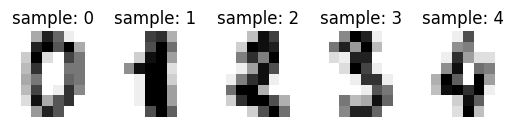

In [10]:
# 전체 샘플 중 상위 5개의 샘플만 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [11]:
# 상위 5개의 레이블 확인
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [12]:
# digits.data를 이용해 첫 번째 샘플 출력
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [13]:
# data를 X에 저장하고 레이블을 Y에 저장
X = digits.data   # 이미지. 즉, 특성 행렬
Y = digits.target   # 각 이미지에 대한 레이블

In [14]:
# 도구 임포트
import torch 
import torch.nn as nn
from torch import optim

In [15]:
# 모델 정의
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer1 = 32, hidden_layer2 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer2 = 16, output_layer = 10
)

In [16]:
# 데이터 로드
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [17]:
# 비용함수 정의
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.

In [18]:
# 옵티마이저 정의
optimizer = optim.Adam(model.parameters())

In [19]:
# 손실값
losses = []

In [20]:
# 훈련 실행
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forward 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(epoch, 100, loss.item()))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.512440
Epoch   10/100 Cost: 2.145337
Epoch   20/100 Cost: 1.917880
Epoch   30/100 Cost: 1.640436
Epoch   40/100 Cost: 1.333694
Epoch   50/100 Cost: 1.023629
Epoch   60/100 Cost: 0.743526
Epoch   70/100 Cost: 0.528852
Epoch   80/100 Cost: 0.393037
Epoch   90/100 Cost: 0.308265


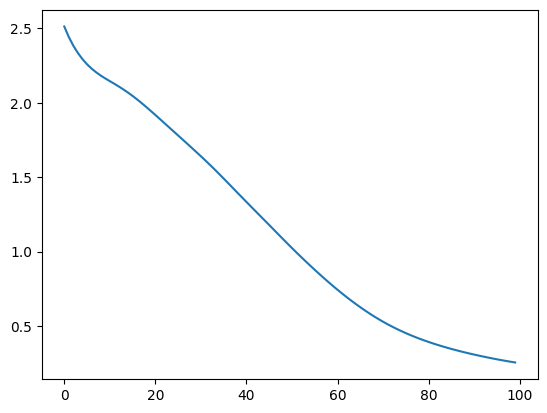

In [21]:
# 손실값 확인
plt.plot(losses)

예측 결과: 4
이 이미지 데이터의 정답 레이블은 4.000000입니다.


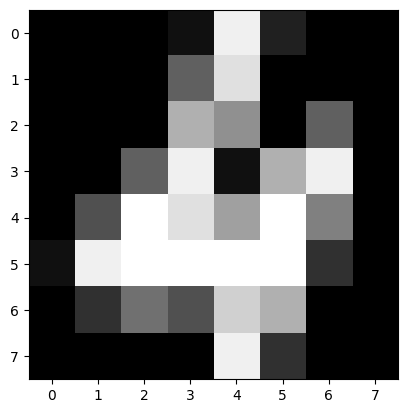

In [22]:
# 모델 테스트
import random

r = random.randint(0, len(X) - 1)
index = r
model.eval()
data = X[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과: {}".format(predicted))

X_test_show = (X[index]).numpy()
plt.imshow(X_test_show.reshape(8, 8), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:0f}입니다.".format(Y[index]))

## 손글씨 분류2

In [23]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        x1 = self.fc1(x)
        x2 = self.relu(x1)
        x3 = self.fc2(x2)
        x4 = self.relu(x3)
        x5 = self.fc3(x4)
    
        return x5

In [25]:
download_root = './MNIST_data'

dataset1 = datasets.MNIST(root=download_root,
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)

dataset2 = datasets.MNIST(root=download_root,
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./MNIST_data\MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST_data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./MNIST_data\MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST_data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./MNIST_data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST_data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./MNIST_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST_data\MNIST\raw



In [26]:
batch_s = 100

# training dataset: dataset1_loader의 len은 600
# test dataset: dataset2_loader의 len은 100
dataset1_loader = DataLoader(dataset1, batch_size=batch_s)
dataset2_loader = DataLoader(dataset2, batch_size=batch_s)

In [27]:
model_dict = {}
loss_dict = {}
accuracy_dict = {}

# optimizer에 따른 학습 정도를 살펴볼 4가지 테스트 케이스
optimizer_case = ['SGD', 'Adam', 'AdaGrad', 'RMSprop']
for key in optimizer_case:
    model_dict[key] = Net()
    loss_dict[key] = []
    accuracy_dict[key] = []

In [28]:
# 4가지 테스트케이스에 대한 optimizer  정의
optimizer_dict = {}
optimizer_dict['SGD'] = optim.SGD(model_dict['SGD'].parameters(), lr=0.001)
optimizer_dict['Adam'] = optim.Adam(model_dict['Adam'].parameters(), lr=0.001)
optimizer_dict['AdaGrad'] = optim.Adagrad(model_dict['AdaGrad'].parameters(), lr=0.001)
optimizer_dict['RMSprop'] = optim.RMSprop(model_dict['RMSprop'].parameters(), lr=0.001)

In [29]:
# loss_function, total batch size, epoch 정의
loss_function = nn.CrossEntropyLoss()
total_batch = len(dataset1_loader) # 600 (60000 / 100) => (train dataset / batch_size)
epochs = np.arange(1, 16)

In [30]:
# 총 4가지 optimizer를 사용하여 학습
for optimizer_name, optimizer in optimizer_dict.items():
    print(optimizer_name)
    for epoch in epochs:
        cost = 0
        for images, labels in dataset1_loader: # dataloader는 image와 label로 구성
            # 하나의 Tensor에 데이터 784(28x28)개가 담긴 리스트가 100개 들어있음
            # 그리고 그것이 총 dataset1_loader의 len인 600개가 존재
            images = images.reshape(100, 784)

            model_dict[optimizer_name].zero_grad()

            # feed forward
            predict = model_dict[optimizer_name].forward(images)

            # loss 값 구하기
            loss = loss_function(predict, labels) # 예측된 것과 label이 얼마나 차이가 나는지

            # back propagation
            loss.backward()

            # optimizer update
            optimizer.step()

            cost += loss # 총 600번의 loss를 더한다

        with torch.no_grad(): # 추론 시 미분하지 않겠다
            total = 0
            correct = 0
            for images, labels in dataset2_loader:
                images = images.reshape(100, 784)

                outputs = model_dict[optimizer_name].forward(images)

                # torch.max에서 두 번째 인자는 dim을 의미
                # 1로 지정했다는 것은 하나의 행에서 가장 큰 값을 찾겠다는 것
                # dim을 지정하면 인덱스에 있는 값과 인덱스를 반환
                _, predict = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predict == labels).sum() # 예측한 것과 labels이 얼마나 일치하는지
        
        avg_cost = cost / total_batch # loss 값 600개의 평균
        accuracy = 100 * (correct / total)

        loss_dict[optimizer_name].append(avg_cost.detach().numpy())
        accuracy_dict[optimizer_name].append(accuracy)

        print("epoch : {} | loss : {:.6f}".format(epoch, avg_cost))
        print("Accuracy : {:.2f}".format(accuracy))        

SGD
epoch : 1 | loss : 2.298786
Accuracy : 19.28
epoch : 2 | loss : 2.276762
Accuracy : 43.04
epoch : 3 | loss : 2.250574
Accuracy : 50.07
epoch : 4 | loss : 2.216076
Accuracy : 52.37
epoch : 5 | loss : 2.167581
Accuracy : 54.14
epoch : 6 | loss : 2.099116
Accuracy : 56.01
epoch : 7 | loss : 2.004493
Accuracy : 59.94
epoch : 8 | loss : 1.878833
Accuracy : 65.41
epoch : 9 | loss : 1.722103
Accuracy : 69.03
epoch : 10 | loss : 1.541622
Accuracy : 71.33
epoch : 11 | loss : 1.354069
Accuracy : 73.80
epoch : 12 | loss : 1.180500
Accuracy : 76.23
epoch : 13 | loss : 1.034760
Accuracy : 78.39
epoch : 14 | loss : 0.919184
Accuracy : 79.97
epoch : 15 | loss : 0.829477
Accuracy : 81.15
Adam
epoch : 1 | loss : 0.410721
Accuracy : 93.26
epoch : 2 | loss : 0.180954
Accuracy : 94.96
epoch : 3 | loss : 0.127068
Accuracy : 95.46
epoch : 4 | loss : 0.095872
Accuracy : 95.58
epoch : 5 | loss : 0.075690
Accuracy : 95.64
epoch : 6 | loss : 0.060935
Accuracy : 96.38
epoch : 7 | loss : 0.048844
Accuracy : 9

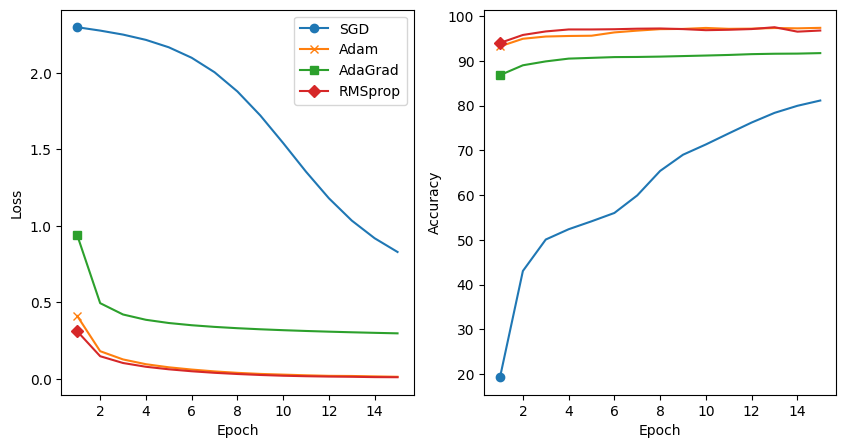

In [31]:
markers = {'SGD' : 'o', 'Adam' : 'x', 'AdaGrad' : 's', 'RMSprop' : 'D'}
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

for key in optimizer_case:
    plt.plot(epochs, loss_dict[key], marker=markers[key], markevery=100, label=key)
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()

plt.subplot(1, 2, 2)
for key in optimizer_case:
    plt.plot(epochs, accuracy_dict[key], marker=markers[key], markevery=100, label=key)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()